Census tract lookup: https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import contextily as ctx 
import geopandas as gpd 
import os 
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [9]:
path = "/home/ec2-user/efs/tl_2019_06_tract/tl_2019_06_tract.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")

<AxesSubplot:>

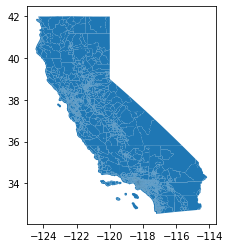

In [11]:
df.plot()

In [13]:
df['census_tract']=df['STATEFP']+df['COUNTYFP']+ df['TRACTCE']

In [62]:
df['colors'] = 1
df.at[df[df['census_tract']=='06071010300'].index,'colors']=2

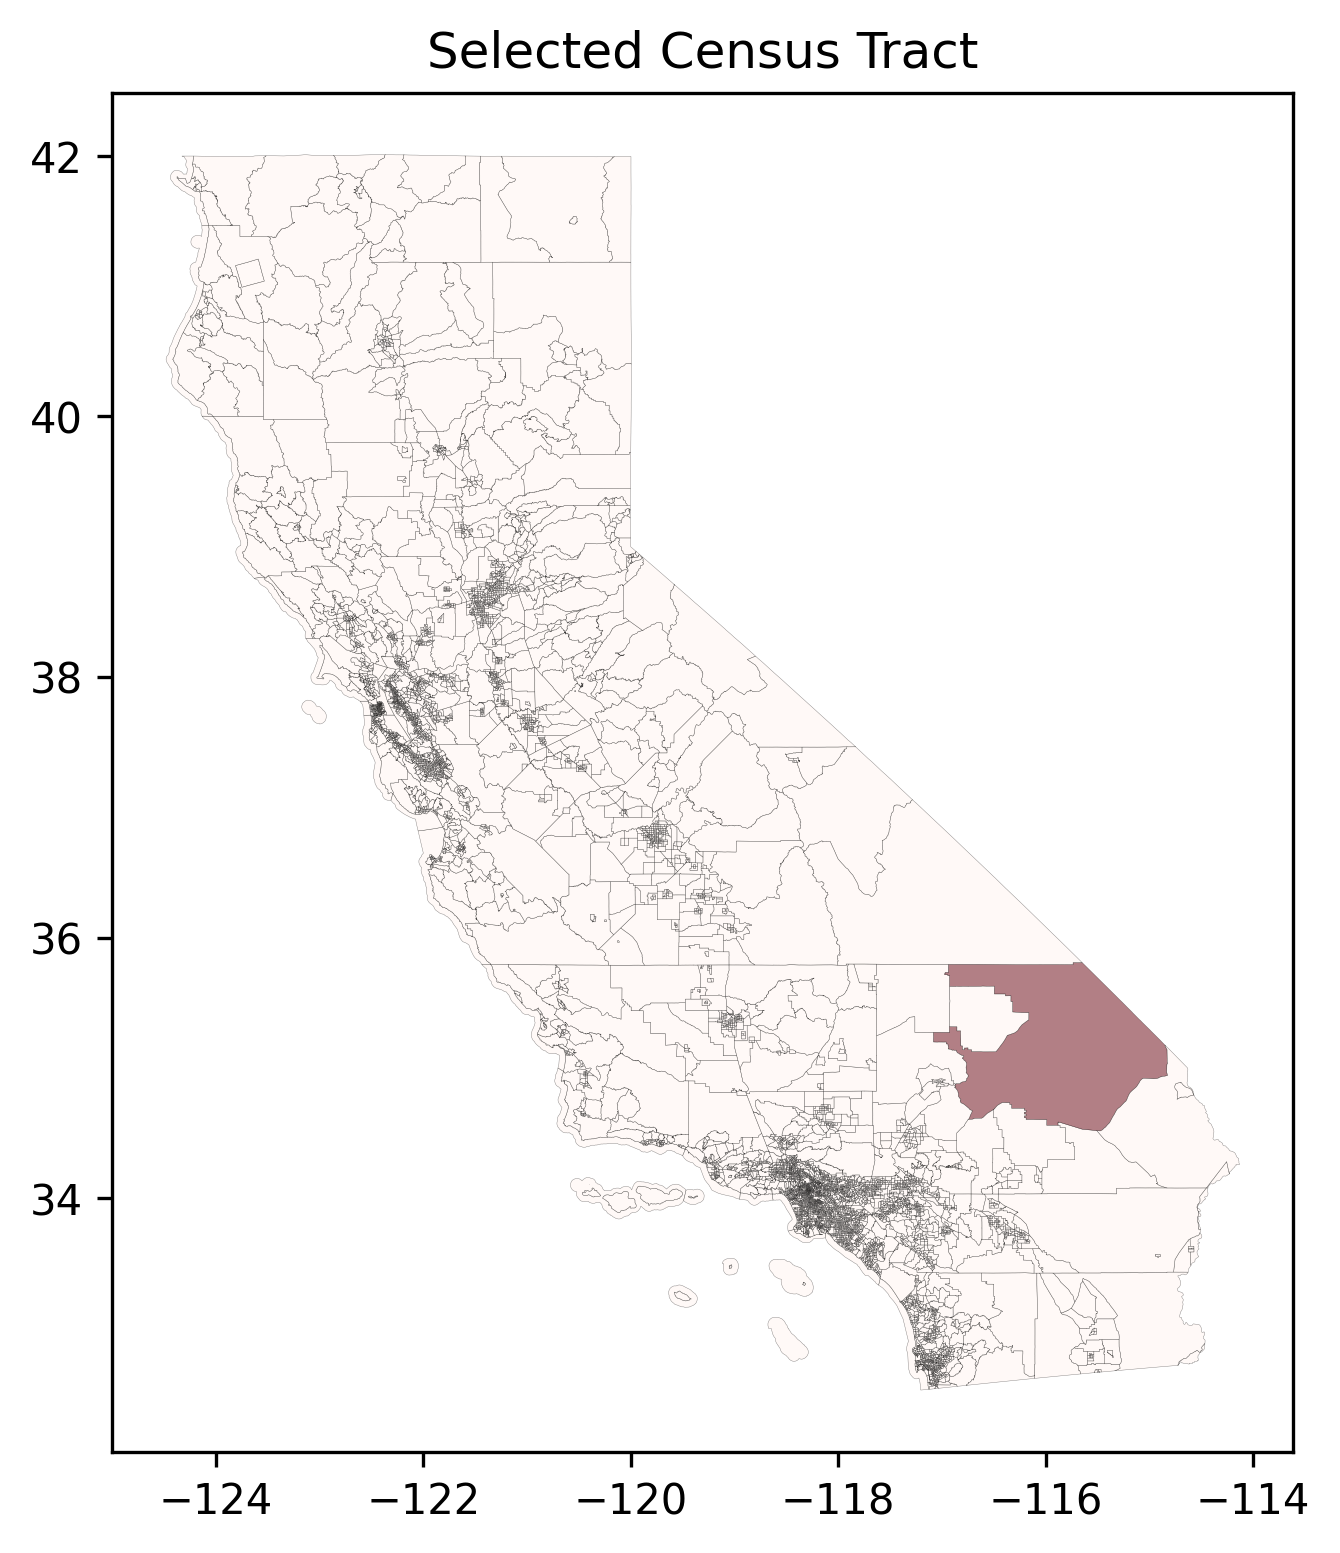

In [64]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Selected Census Tract')
df.plot('colors', ax=ax, cmap='Reds', alpha=0.5, edgecolor='k', linewidth=0.1)
plt.show()

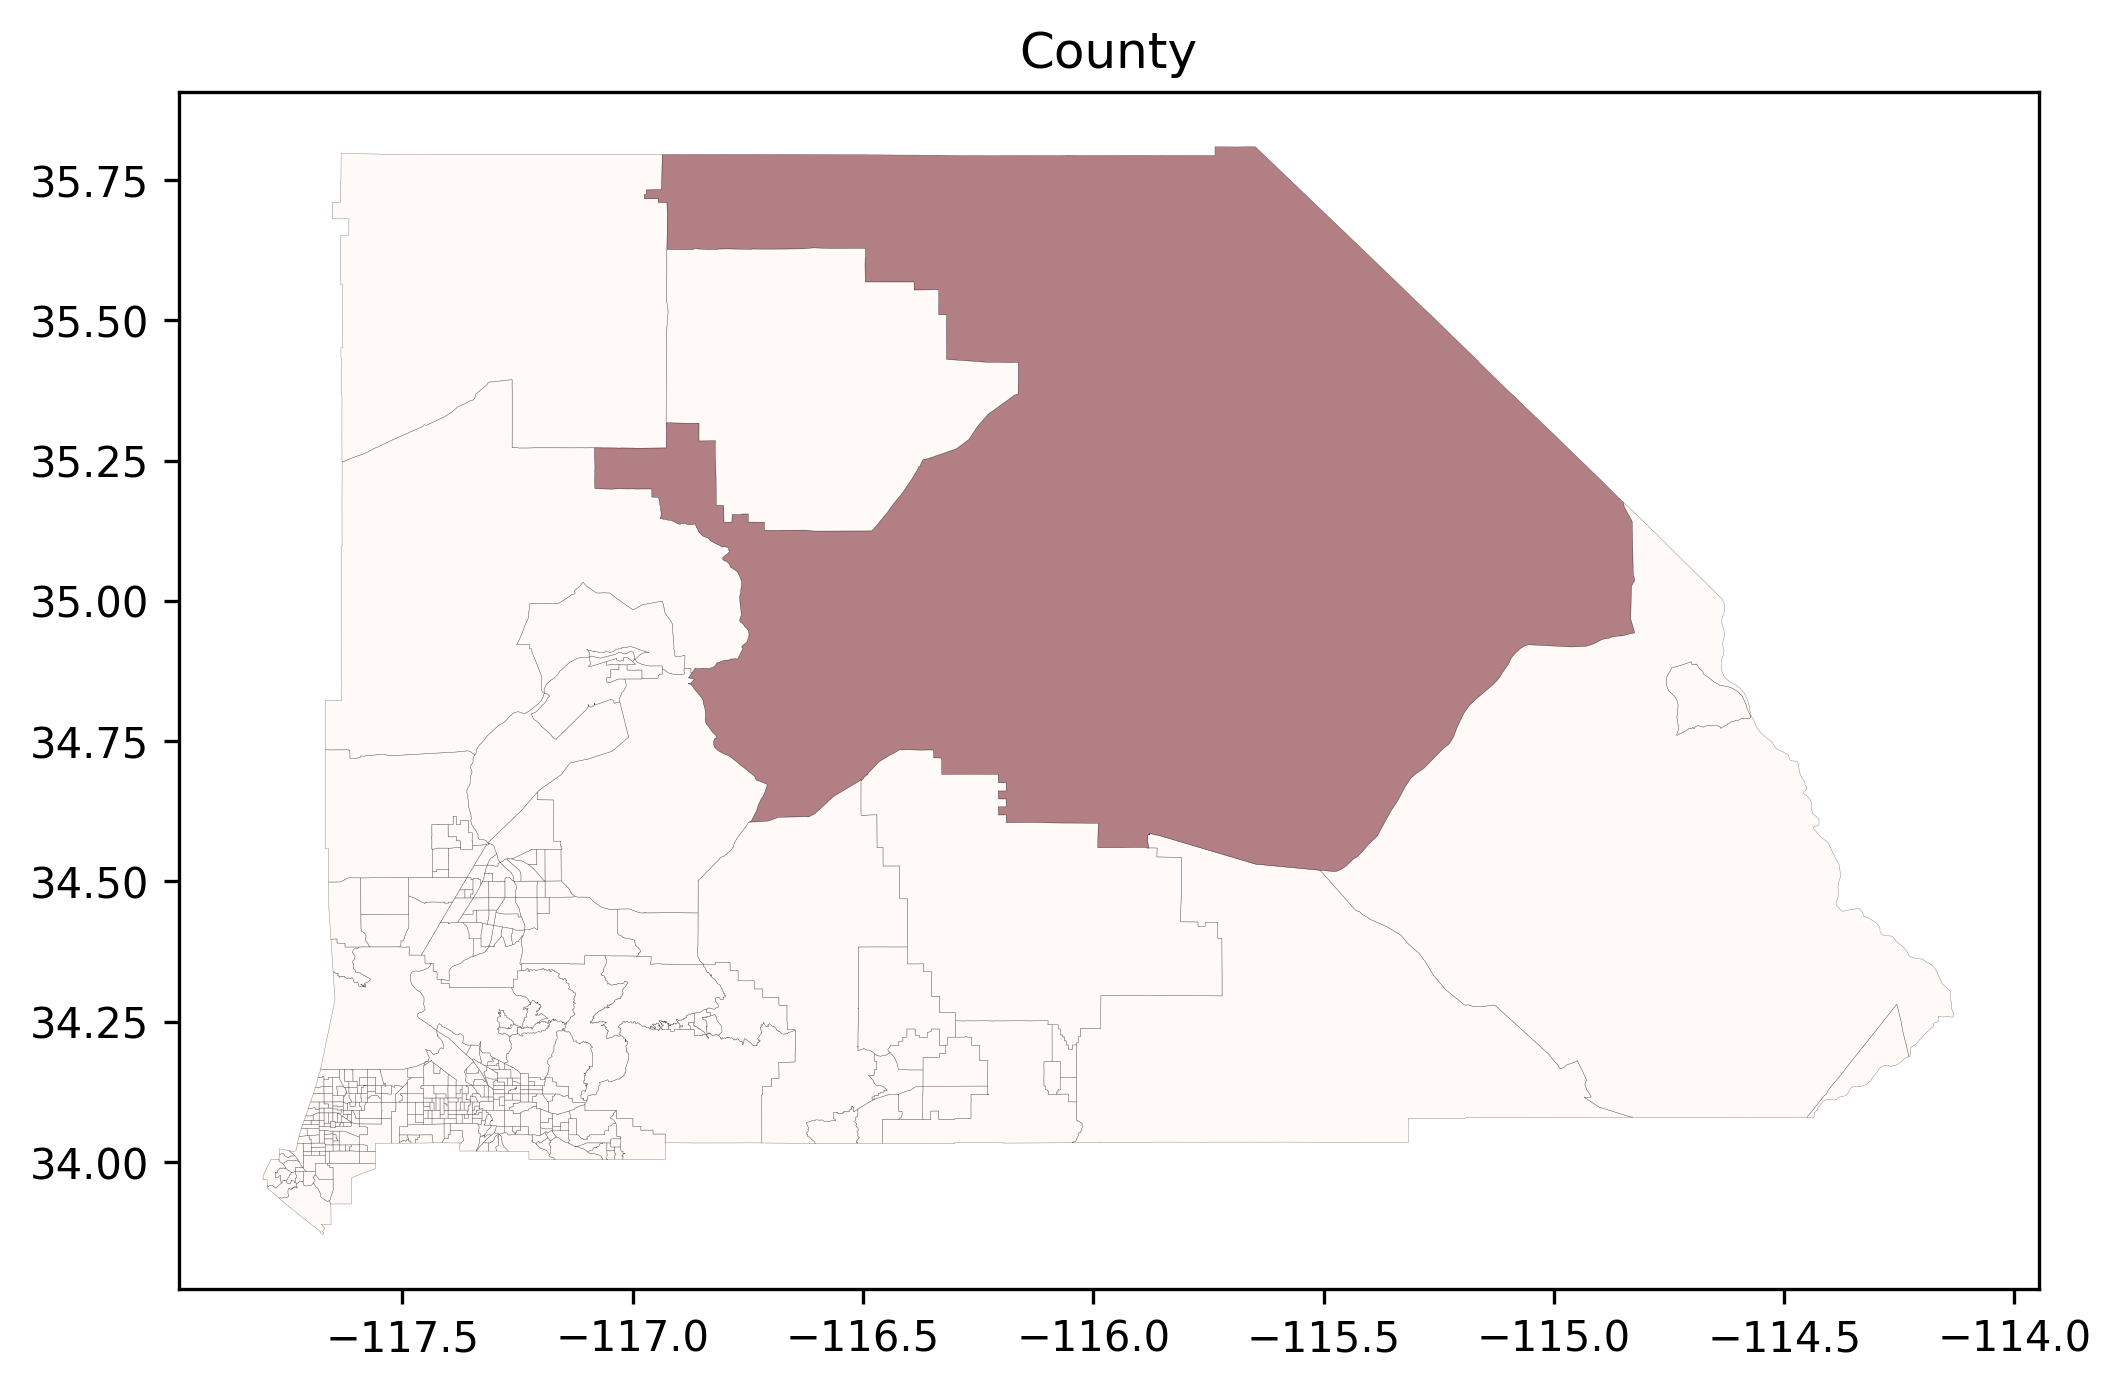

In [67]:
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('County')
df[df['COUNTYFP']=='071'].plot('colors', ax=ax, cmap='Reds', alpha=0.5, edgecolor='k', linewidth=0.1)
plt.show()

In [69]:
'06071010300'[2:5]

'071'

In [10]:
state_lookup_dict = {"Alabama":"tl_2019_01_tract",
                    "Alaska":"tl_2019_02_tract",
                    "Arizona":"tl_2019_04_tract",
                    "Arkansas":"tl_2019_05_tract",
                    "California":"tl_2019_06_tract",
                    "Colorado":"tl_2019_08_tract",
                    "Connecticut":"tl_2019_09_tract",
                    "Delaware":"tl_2019_10_tract",
                    "District of Columbia":"tl_2019_11_tract",
                    "Florida":"tl_2019_12_tract",
                    "Georgia":"tl_2019_13_tract",
                    "Hawaii":"tl_2019_15_tract",
                    "Idaho":"tl_2019_16_tract",
                    "Illinois":"tl_2019_17_tract",
                    "Indiana":"tl_2019_18_tract",
                    "Iowa":"tl_2019_19_tract",
                    "Kansas":"tl_2019_20_tract",
                    "Kentucky":"tl_2019_21_tract",
                    "Louisiana":"tl_2019_22_tract",
                    "Maine":"tl_2019_23_tract",
                    "Maryland":"tl_2019_24_tract",
                    "Massachusetts":"tl_2019_25_tract",
                    "Michigan":"tl_2019_26_tract",
                    "Minnesota":"tl_2019_27_tract",
                    "Mississippi":"tl_2019_28_tract",
                    "Missouri":"tl_2019_29_tract",
                    "Montana":"tl_2019_30_tract",
                    "Nebraska":"tl_2019_31_tract",
                    "Nevada":"tl_2019_32_tract",
                    "New Hampshire":"tl_2019_33_tract",
                    "New Jersey":"tl_2019_34_tract",
                    "New Mexico":"tl_2019_35_tract",
                    "New York":"tl_2019_36_tract",
                    "North Carolina":"tl_2019_37_tract",
                    "North Dakota":"tl_2019_38_tract",
                    "Ohio":"tl_2019_39_tract",
                    "Oklahoma":"tl_2019_40_tract",
                    "Oregon":"tl_2019_41_tract",
                    "Pennsylvania":"tl_2019_42_tract",
                    "Rhode Island":"tl_2019_44_tract",
                    "South Carolina":"tl_2019_45_tract",
                    "South Dakota":"tl_2019_46_tract",
                    "Tennessee":"tl_2019_47_tract",
                    "Texas":"tl_2019_48_tract",
                    "Utah":"tl_2019_49_tract",
                    "Vermont":"tl_2019_50_tract",
                    "Virginia":"tl_2019_51_tract",
                    "Washington":"tl_2019_53_tract",
                    "West Virginia":"tl_2019_54_tract",
                    "Wisconsin":"tl_2019_55_tract",
                    "Wyoming":"tl_2019_56_tract"}

In [4]:
state_lookup_dict['California']

'tl_2019_06'

In [14]:
#As a function:
def plot_selected_tract(tract_code, state): 
    lookup_file = state_lookup_dict['California']
    path = "/home/ec2-user/efs/"+lookup_file+"/"+lookup_file+".shp"
    df = gpd.read_file(path)
    df = df.to_crs("EPSG:4326")
    
    df['census_tract']=df['STATEFP']+df['COUNTYFP']+ df['TRACTCE']
    df['colors'] = 0
    df.at[df[df['COUNTYFP']==tract_code[2:5]].index,'colors']=0.25
    df.at[df[df['census_tract']==tract_code].index,'colors']=1
    
    f,ax = plt.subplots(1,2, figsize=(8,6), dpi=300)
    df.plot('colors', ax=ax[0], cmap='Reds', alpha=0.5, edgecolor='k', linewidth=0.1)
    df[df['COUNTYFP']==tract_code[2:5]].plot('colors', ax=ax[1], cmap='Reds', alpha=0.5, edgecolor='k', linewidth=0.1)
    plt.show()

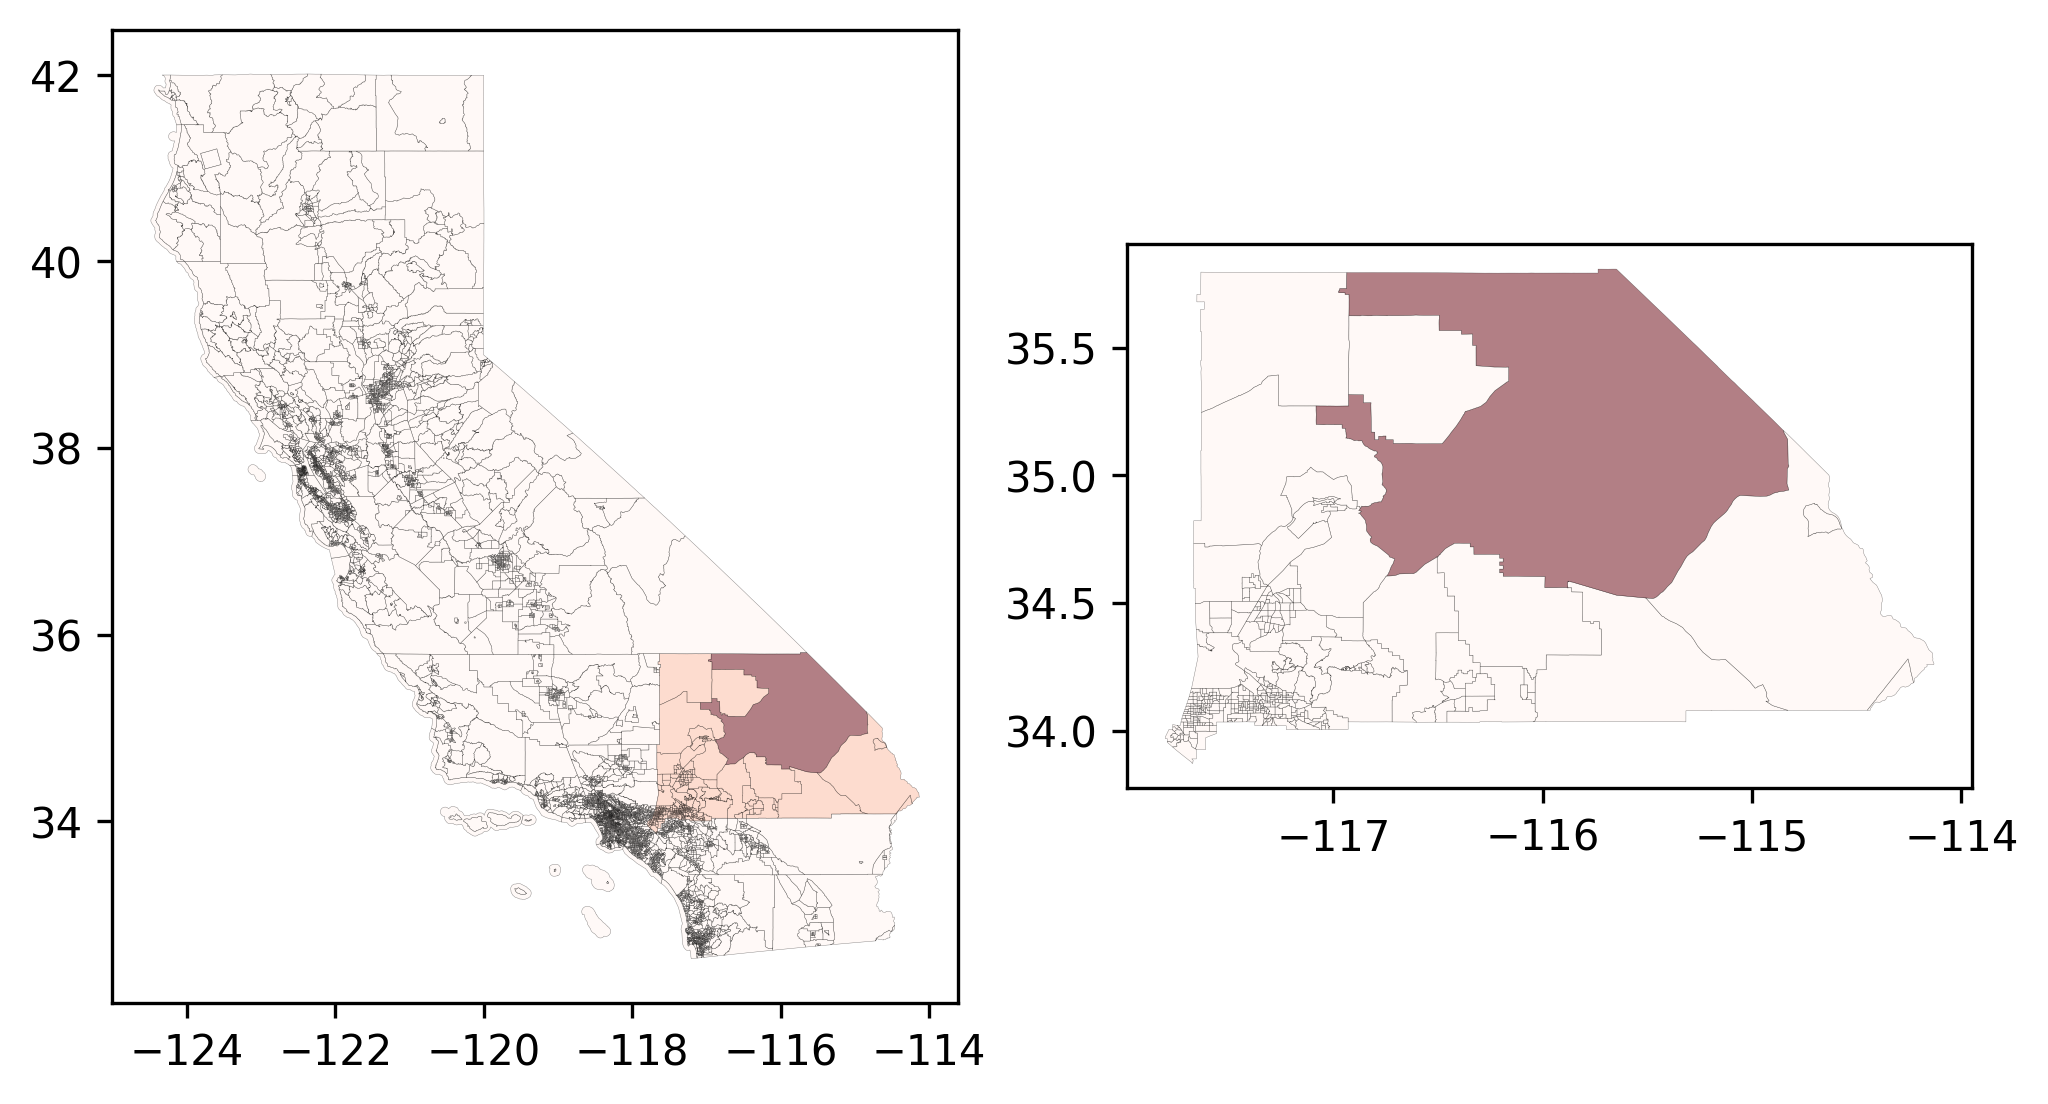

In [15]:
plot_selected_tract('06071010300', 'California')